# Recovery Notebook

This notebook is for scraping the data from the input json files of the users to determine what remaining errors they left in each scenario

## Imports

In [1]:
# Have All the Changes Please
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

### Ground Truth Values

In [2]:
Q = [[5000, 1500, 2500], [0, 0, 1], [0, 1, 1], [1, 1, 0]]
Q = np.asarray(Q)

Y = [[4200, 1200, 500, 195, 140, 2000, 0], [0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 0]]
Y = np.asarray(Y)

speed = [0.4, 0.7, 0.8]
speed = np.asarray(speed)

print(Q)
print(Y)
print(speed)

[[5000 1500 2500]
 [   0    0    1]
 [   0    1    1]
 [   1    1    0]]
[[4200 1200  500  195  140 2000    0]
 [   0    0    0    1    1    0    0]
 [   0    1    1    0    0    1    1]
 [   1    0    0    0    0    0    0]]
[0.4 0.7 0.8]


### Get User Ids

In [3]:
directory = os.fsencode('user_data/user_json/')
ids = [id.decode() for id in os.listdir(directory)]

print(ids)

['10552', '10941', '17510', '18634', '20038', '21356', '22388', '25858', '31493', '48765', '49430', '61352', '61974', '63191', '68101', '75187', '80131', '86884', '89175', '89194', '92897', '99983']


In [4]:
q_error_start = [3, 2, 0, 3]
q_errors = 8
y_error_start = [1, 2, 5, 0]
y_errors = 8
speed_error_start = [1, 1, 0, 2]
speed_errors = 4

### Import Data with 1 row for each participant

In [5]:
data = pd.DataFrame(columns=['id', 'study_condition', 'Q_errors_remaining', 'Q_error_remaining_percentage', 'Y_remaining_errors', 'Y_error_remaining_percentage', 'speed_remaining_errors', 'speed_error_remaining_percentage', 'total_remaining_error', 'total_remaining_error_percentage', 'avg_error'])

In [6]:
index = 0

scenarios = ['low_2', 'low_4', 'low_5', 'low_6']

for id in ids:
    final_edit_distance = []
    files = os.listdir(directory.decode()+id)
    Q_user_errors = 0
    Y_user_errors = 0
    speed_user_errors = 0
    # Go through every file for a participant
    for file in files:
        Q_temp_errors = 0
        Y_temp_errors = 0
        speed_temp_errors = 0
        # Skip No-Error Scenarios
        if not any(map(file.__contains__, scenarios)):
            continue
        
        # Save the scenario name
        for scenario in scenarios:
            if scenario in file:
                scenario_name = scenario
                
        with open('user_data/' + id + '.json') as f:
            d = json.load(f)
            study_condition = d[id]['warmup_1']['study_condition']
            if(study_condition == 1):
                study_condition = "Z"
            else:
                study_condition = "ours"
        
        # Import data from json file
        with open(directory.decode()+id+'/'+file) as f:
            d = json.load(f)
        
        for i, specie in enumerate(d['species']):
            # Check Species Traits
            Q_user_errors = Q_user_errors + np.count_nonzero(specie['traits'] - Q[:, i])
            Q_temp_errors = Q_temp_errors + np.count_nonzero(specie['traits'] - Q[:, i])
                
            # Check Species Speed    
            speed_user_errors = speed_user_errors + np.count_nonzero(specie['speed'] - speed[i])
            speed_temp_errors = speed_temp_errors + np.count_nonzero(specie['speed'] - speed[i])
            
        for i, task in enumerate(d['tasks']):
            # Check Task Requirements  
            Y_user_errors = Y_user_errors + np.count_nonzero(task['desired_traits'] - Y[:, i])
            Y_temp_errors = Y_temp_errors + np.count_nonzero(task['desired_traits'] - Y[:, i])
            
        final_edit_distance.append((Q_temp_errors+speed_temp_errors+Y_temp_errors))
        
    q_error_percentage = (Q_user_errors/q_errors)*100
    y_error_percentage = (Y_user_errors/y_errors)*100
    speed_error_percentage = (speed_user_errors/speed_errors)*100
        
    total_error_percentage = ((Q_user_errors + speed_errors + Y_user_errors)/(q_errors + y_errors + speed_errors))*100
    total_error = Q_user_errors + speed_user_errors + Y_user_errors
    
    avg_edit_distance = np.average(final_edit_distance)
        
    data.loc[index] = [id, study_condition, Q_user_errors, q_error_percentage, Y_user_errors, y_error_percentage, speed_user_errors, speed_error_percentage, total_error, total_error_percentage, avg_edit_distance]
    index = index + 1


In [7]:
data

,id,study_condition,Q_errors_remaining,Q_error_remaining_percentage,Y_remaining_errors,Y_error_remaining_percentage,speed_remaining_errors,speed_error_remaining_percentage,total_remaining_error,total_remaining_error_percentage,avg_error
0,10552,Z,8,100.0,5,62.5,4,100.0,17,85.0,4.25
1,10941,Z,7,87.5,5,62.5,1,25.0,13,80.0,3.25
2,17510,ours,3,37.5,4,50.0,1,25.0,8,55.0,2.00
3,18634,ours,8,100.0,4,50.0,4,100.0,16,80.0,4.00
4,20038,ours,4,50.0,5,62.5,0,0.0,9,65.0,2.25
5,21356,Z,8,100.0,5,62.5,1,25.0,14,85.0,3.50
6,22388,ours,2,25.0,2,25.0,0,0.0,4,40.0,1.00
7,25858,ours,0,0.0,0,0.0,1,25.0,1,20.0,0.25
8,31493,Z,7,87.5,7,87.5,2,50.0,16,90.0,4.00
9,48765,ours,2,25.0,4,50.0,0,0.0,6,50.0,1.50


In [24]:
ours = data[data['study_condition']=='ours']
total = ours['total_remaining_error'].tolist()
print(total)
total = [20-t for t in total]
print(total)
p = (np.sum(total))/(20*len(total))
print(p)

[8, 16, 9, 4, 1, 6, 5, 1, 7, 14, 12]
[12, 4, 11, 16, 19, 14, 15, 19, 13, 6, 8]
249.0909090909091


In [23]:
zehtabi = data[data['study_condition']=='Z']
total = zehtabi['total_remaining_error'].tolist()
total = [20 - t for t in total]
print(total)
p = (np.sum(total))/(20*len(total))
print(p)

[3, 7, 6, 4, 5, 5, 4, 7, 10, 7, 7]
0.29545454545454547


## Save DF to CSV

In [81]:
#holistic CSV
data.to_csv('user_data/user_data_percentages.csv', encoding='utf-8', index=False)

In [428]:
#saving statistical analyses related CSVS
Y_error_stat_data = pd.DataFrame({'id': data["id"],'study_condition':data["study_condition"], 'y_percentage':data["Y_error_remaining_percentage"]})
Y_error_stat_data.to_csv('user_data/y_data.csv', encoding='utf-8', index=False)

Q_error_stat_data = pd.DataFrame({'id': data["id"],'study_condition':data["study_condition"], 'q_percentage':data["Q_error_remaining_percentage"]})
Q_error_stat_data.to_csv('user_data/q_data.csv', encoding='utf-8', index=False)

Y_error_stat_data = pd.DataFrame({'id': data["id"],'study_condition':data["study_condition"], 'speed_percentage':data["speed_error_remaining_percentage"]})
Y_error_stat_data.to_csv('user_data/speed_data.csv', encoding='utf-8', index=False)



# Paper Graphs

### Box plots for the 3 error types

In [7]:
labels = ["CE-MRS (Ours)", "CMAoE"]
def generate_mask(study_cond):
    mask = []
    for val in study_cond:
        if val == "Z":
            mask.append(1)
        else:
            mask.append(0)
    return mask

def get_data_arrs(mask, arr):
    Z_arr = []
    ours_arr = []
    for i, val in enumerate(arr):
        if(mask[i] == 0):
            ours_arr.append(arr[i])
        else:
            Z_arr.append(arr[i])
    return Z_arr, ours_arr

In [8]:
#Plotting Q Error (Robot Specification Error)
def generate_boxplots(mask, Z_data_specific, our_data_specific, title, filename, use_y_axis):

    plot_data = [our_data_specific, Z_data_specific]
    fig = plt.figure(figsize =(7,6))
    fontsize = 24

    # Creating axes instance
    ax = fig.add_axes([0,0, 1, 1])
    # Creating plot
    line_width = 2.2
    median_color = 'red'
    box_colors = ["#80cdc1",'#dfc27d']
    bp = plt.boxplot(plot_data, labels = labels, widths=0.3, boxprops=dict(linewidth=line_width),
                whiskerprops=dict(linewidth=line_width),
                medianprops=dict(linewidth=2.8, color = median_color),
                capprops=dict(linewidth=line_width), patch_artist=True)
    # Set box facecolors
    for box, color in zip(bp['boxes'], box_colors):
        box.set_facecolor(color)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    if use_y_axis:
        plt.ylabel("Remaining Percentage of Errors", fontsize=fontsize)
        
    else:
        plt.ylabel("                              ", fontsize=fontsize)
    plt.ylim(-5, 120)
    plt.title(title, fontsize=fontsize)
    plt.savefig(f"{filename}.jpg", bbox_inches="tight", dpi="figure")
    # plt.show()
    plt.close()

In [9]:
mask = generate_mask(data["study_condition"]) 
Z_data_q ,our_data_q = get_data_arrs(mask, data["Q_error_remaining_percentage"])
generate_boxplots(mask, Z_data_q, our_data_q, "Remaining Robot Trait Errors (RTE%)", "q_error_box_plot", False)

Z_data_y ,our_data_y = get_data_arrs(mask, data["Y_error_remaining_percentage"])
generate_boxplots(mask, Z_data_y, our_data_y, "Remaining Task Requirement Errors (TRE%)", "y_error_box_plot", False)

Z_data_speed ,our_data_speed = get_data_arrs(mask, data["speed_error_remaining_percentage"])
generate_boxplots(mask, Z_data_speed, our_data_speed, "Remaining Robot Speed Errors (RSE%)", "speed_error_box_plot", True)


Text(0.5, 1.0, 'Remaining Percentage of Speed Specification Errors')

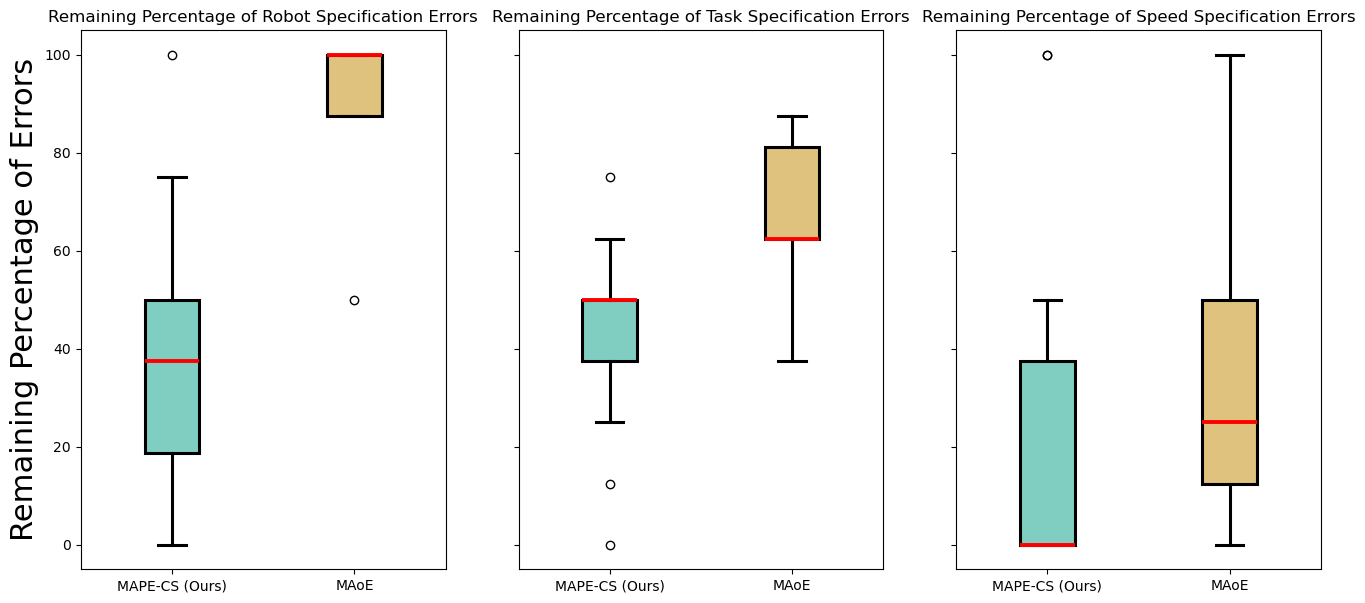

In [492]:
mask = generate_mask(data["study_condition"]) 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
Z_data_q ,our_data_q = get_data_arrs(mask, data["Q_error_remaining_percentage"])

f.set_figheight(7)
f.set_figwidth(16)

plot_data = [our_data_q, Z_data_q]
fontsize = 22

# Creating axes instance
ax = fig.add_axes([0,0, 1, 1])
# Creating plot
line_width = 2.2
median_color = 'red'
box_colors = ["#80cdc1",'#dfc27d']
bp = ax1.boxplot(plot_data, labels = labels, widths=0.3, boxprops=dict(linewidth=line_width),
            whiskerprops=dict(linewidth=line_width),
            medianprops=dict(linewidth=2.8, color = median_color),
            capprops=dict(linewidth=line_width), patch_artist=True)
# Set box facecolors
for box, color in zip(bp['boxes'], box_colors):
    box.set_facecolor(color)
    
ax1.set_title('Remaining Percentage of Robot Specification Errors')
ax1.set_ylabel('Remaining Percentage of Errors', fontsize=fontsize)

Z_data_y ,our_data_y = get_data_arrs(mask, data["Y_error_remaining_percentage"])
plot_data = [our_data_y, Z_data_y]
# Creating axes instance
ax = fig.add_axes([0,0, 1, 1])
# Creating plot
line_width = 2.2
median_color = 'red'
box_colors = ["#80cdc1",'#dfc27d']
bp = ax2.boxplot(plot_data, labels = labels, widths=0.3, boxprops=dict(linewidth=line_width),
            whiskerprops=dict(linewidth=line_width),
            medianprops=dict(linewidth=2.8, color = median_color),
            capprops=dict(linewidth=line_width), patch_artist=True)
# Set box facecolors
for box, color in zip(bp['boxes'], box_colors):
    box.set_facecolor(color)
    
ax2.set_title('Remaining Percentage of Task Specification Errors')
    
Z_data_speed ,our_data_speed = get_data_arrs(mask, data["speed_error_remaining_percentage"])
plot_data = [our_data_speed, Z_data_speed]
# Creating axes instance
ax = fig.add_axes([0,0, 1, 1])
# Creating plot
line_width = 2.2
median_color = 'red'
box_colors = ["#80cdc1",'#dfc27d']
bp = ax3.boxplot(plot_data, labels = labels, widths=0.3, boxprops=dict(linewidth=line_width),
            whiskerprops=dict(linewidth=line_width),
            medianprops=dict(linewidth=2.8, color = median_color),
            capprops=dict(linewidth=line_width), patch_artist=True)
# Set box facecolors
for box, color in zip(bp['boxes'], box_colors):
    box.set_facecolor(color)
    
ax3.set_title('Remaining Percentage of Speed Specification Errors')

# Analyze Data

### Seperate Data into 2 Study Conditions

In [395]:
study_condition_1 = data[data['study_condition'] == 1]
study_condition_2 = data[data['study_condition'] == 2]

print(study_condition_1['total_remaining_error'])
print(study_condition_2['total_remaining_error'])

0     17
1     13
5     14
8     16
10    15
11    13
12    10
13    13
16    13
Name: total_remaining_error, dtype: int64
2      8
3     16
4      9
6      4
7      1
9      6
14     1
15     7
17    12
Name: total_remaining_error, dtype: int64


### Test Graphs using Seperated Data

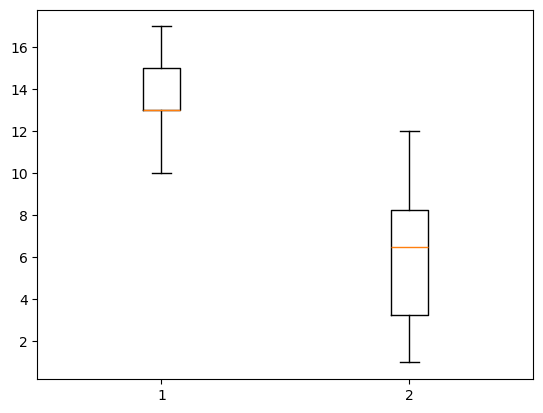

In [ ]:
s = study_condition_1['total_remaining_error'].tolist()
t = study_condition_2['total_remaining_error'].tolist()

plt.boxplot([s, t])
plt.show()

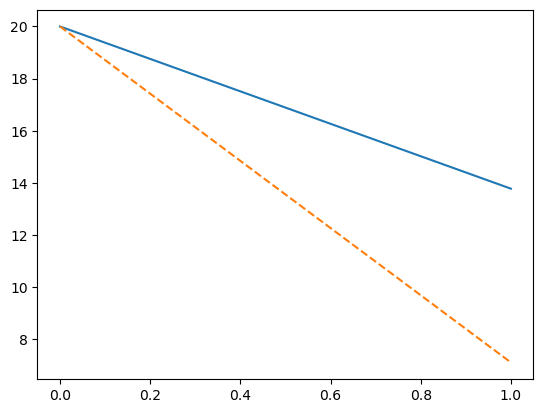

In [396]:
s = np.average(study_condition_1['total_remaining_error'].tolist())
t = np.average(study_condition_2['total_remaining_error'].tolist())

plt.plot([0, 1], [20, s], '-')
plt.plot([0, 1], [20, t], '--')

plt.show()

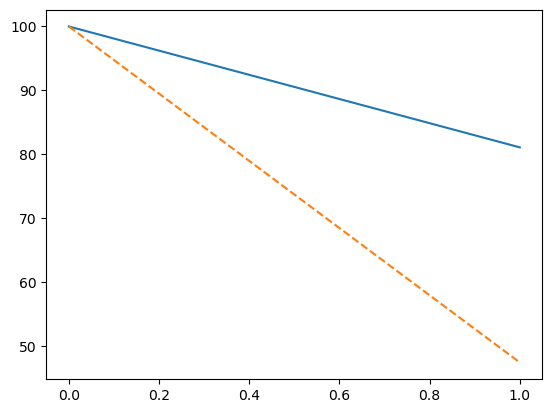

In [ ]:
s = np.average(study_condition_1['total_remaining_error_percentage'].tolist())
t = np.average(study_condition_2['total_remaining_error_percentage'].tolist())

plt.plot([0, 1], [100, s], '-')
plt.plot([0, 1], [100, t], '--')

plt.show()

### Setup for Following Graphs

In [ ]:
condition_1_q_errors = []
condition_1_y_errors = []
condition_1_speed_errors = []


for scenario in scenarios:
    scenario_data = study_condition_1[study_condition_1['scenario'] == scenario]
    condition_1_q_errors.append(np.average(scenario_data['Q_errors'].tolist()))
    condition_1_y_errors.append(np.average(scenario_data['Y_errors'].tolist()))
    condition_1_speed_errors.append(np.average(scenario_data['speed_errors'].tolist()))
    
print(condition_1_q_errors)
print(condition_1_y_errors)
print(condition_1_speed_errors)

[1.8888888888888888, 1.4444444444444444, 0.0, 2.0]
[1.0, 1.0, 2.6666666666666665, 0.0]
[0.2222222222222222, 0.3333333333333333, 0.0, 1.0]


In [ ]:
condition_2_q_errors = []
condition_2_y_errors = []
condition_2_speed_errors = []


for scenario in scenarios:
    scenario_data = study_condition_2[study_condition_2['scenario'] == scenario]
    condition_2_q_errors.append(np.average(scenario_data['Q_errors'].tolist()))
    condition_2_y_errors.append(np.average(scenario_data['Y_errors'].tolist()))
    condition_2_speed_errors.append(np.average(scenario_data['speed_errors'].tolist()))
    
print(condition_2_q_errors)
print(condition_2_y_errors)
print(condition_2_speed_errors)

[0.375, 0.125, 0.0, 0.875]
[0.625, 1.0, 1.5, 0.0]
[0.0, 0.125, 0.0, 0.375]


In [ ]:
q_error_start = [3, 2, 0, 3]
y_error_start = [1, 2, 5, 0]
speed_error_start = [1, 1, 0, 2]

### Value Graphs

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\1052980431.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


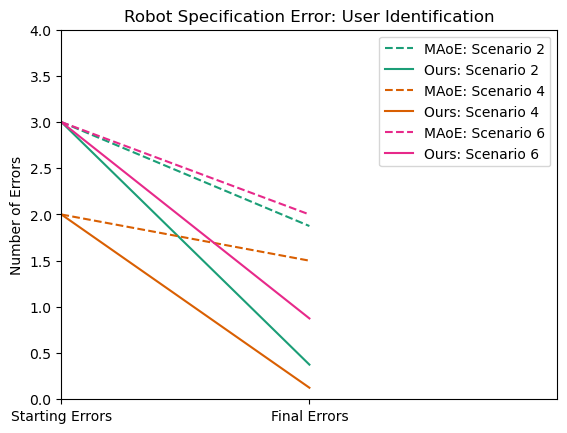

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0
for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '5':
        continue
    
    x = [0, 1]
    y = [q_error_start[i], condition_1_q_errors[i]]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    
    x = [0, 1]
    y = [q_error_start[i], condition_2_q_errors[i]]
    
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    
    c = c + 1
    
plt.xlim(0, 2)
plt.ylim(0, 4)

plt.xticks([0, 1], ["Starting Errors", "Final Errors"])

plt.ylabel('Number of Errors')

plt.title('Robot Specification Error: User Identification')

plt.legend()
plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\1996060810.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


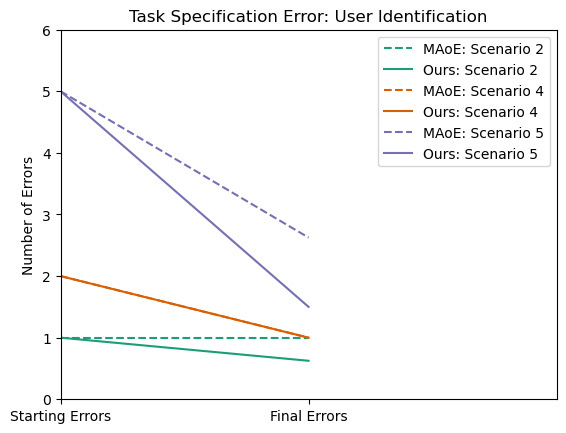

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0
for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '6':
        continue
    
    x = [0, 1]
    y = [y_error_start[i], condition_1_y_errors[i]]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    
    x = [0, 1]
    y = [y_error_start[i], condition_2_y_errors[i]]
    
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    
    c = c + 1
    
plt.xlim(0, 2)
plt.ylim(0, 6)

plt.xticks([0, 1], ["Starting Errors", "Final Errors"])

plt.ylabel('Number of Errors')

plt.title('Task Specification Error: User Identification')

plt.legend()
plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\1855126361.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


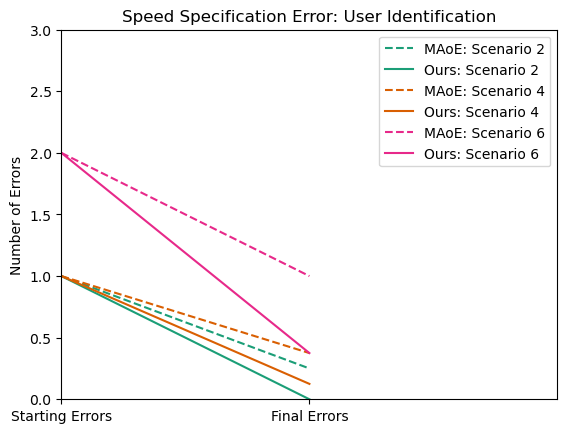

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0
for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '5':
        continue
    
    x = [0, 1]
    y = [speed_error_start[i], condition_1_speed_errors[i]]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    
    x = [0, 1]
    y = [speed_error_start[i], condition_2_speed_errors[i]]
    
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    
    c = c + 1
    
plt.xlim(0, 2)
plt.ylim(0, 3)

plt.xticks([0, 1], ["Starting Errors", "Final Errors"])

plt.ylabel('Number of Errors')

plt.title('Speed Specification Error: User Identification')

plt.legend()
plt.show()

### Percent Graphs

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\2601728132.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


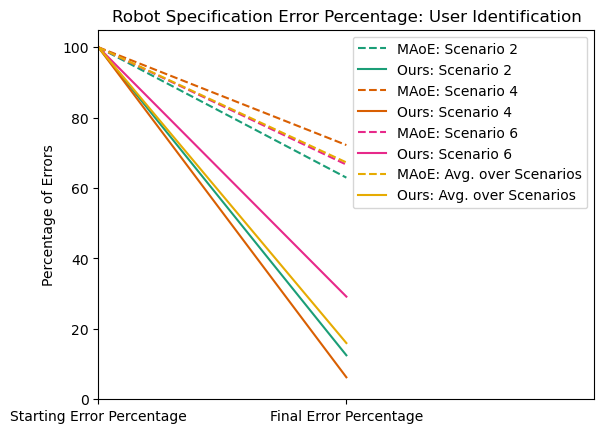

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0

z_avg = []
o_avg = []

for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '5':
        continue
    
    x = [0, 1]
    y = [(q_error_start[i]/q_error_start[i])*100, (condition_1_q_errors[i]/q_error_start[i])*100]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    z_avg.append((condition_1_q_errors[i]/q_error_start[i])*100)
    
    x = [0, 1]
    y = [(q_error_start[i]/q_error_start[i])*100, (condition_2_q_errors[i]/q_error_start[i])*100]
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    o_avg.append((condition_2_q_errors[i]/q_error_start[i])*100)
    
    c = c + 1
    
x = [0, 1]
y = [(np.average(q_error_start)/np.average(q_error_start))*100, np.average(z_avg)]
plt.plot(x, y, '--', color=cmap(len(q_error_start)+1), label='MAoE: Avg. over Scenarios')

x = [0, 1]
y = [(np.average(q_error_start)/np.average(q_error_start))*100, np.average(o_avg)]
plt.plot(x, y, '-', color=cmap(len(q_error_start)+1), label='Ours: Avg. over Scenarios')
    
plt.xlim(0, 2)
plt.ylim(0, 105)

plt.xticks([0, 1], ["Starting Error Percentage", "Final Error Percentage"])

plt.ylabel('Percentage of Errors')

plt.title('Robot Specification Error Percentage: User Identification')

plt.legend()
plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\234592543.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


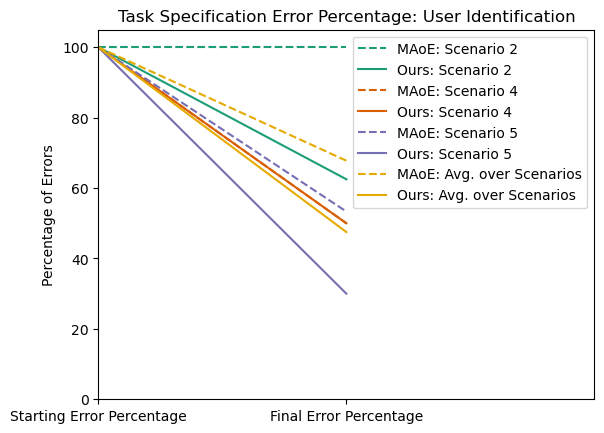

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0

z_avg = []
o_avg = []

for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '6':
        continue
    
    x = [0, 1]
    y = [(y_error_start[i]/y_error_start[i])*100, (condition_1_y_errors[i]/y_error_start[i])*100]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    z_avg.append((condition_1_y_errors[i]/y_error_start[i])*100)
    
    x = [0, 1]
    y = [(y_error_start[i]/y_error_start[i])*100, (condition_2_y_errors[i]/y_error_start[i])*100]
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    o_avg.append((condition_2_y_errors[i]/y_error_start[i])*100)
    
    c = c + 1
    
x = [0, 1]
y = [(np.average(y_error_start)/np.average(y_error_start))*100, np.average(z_avg)]
plt.plot(x, y, '--', color=cmap(len(q_error_start)+1), label='MAoE: Avg. over Scenarios')

x = [0, 1]
y = [(np.average(y_error_start)/np.average(y_error_start))*100, np.average(o_avg)]
plt.plot(x, y, '-', color=cmap(len(q_error_start)+1), label='Ours: Avg. over Scenarios')
    
plt.xlim(0, 2)
plt.ylim(0, 105)

plt.xticks([0, 1], ["Starting Error Percentage", "Final Error Percentage"])

plt.ylabel('Percentage of Errors')

plt.title('Task Specification Error Percentage: User Identification')

plt.legend()
plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_7256\1214394539.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


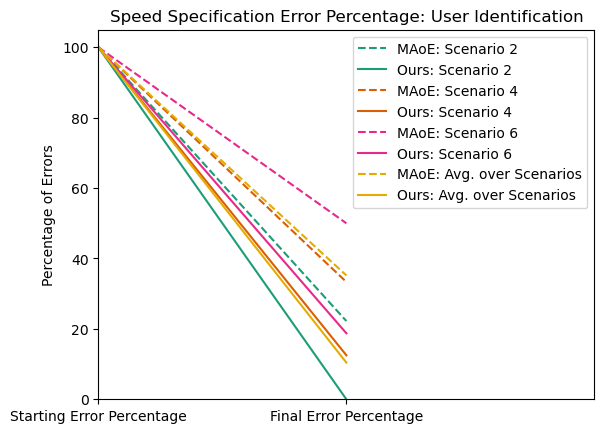

In [ ]:
cmap = plt.cm.get_cmap('Dark2')
c = 0

z_avg = []
o_avg = []

for i in range(len(q_error_start)):
    
    scenario_num = scenarios[i][-1]
    
    if scenario_num == '5':
        continue
    
    x = [0, 1]
    y = [(speed_error_start[i]/speed_error_start[i])*100, (condition_1_speed_errors[i]/speed_error_start[i])*100]
    plt.plot(x, y, '--', color=cmap(i), label='MAoE: Scenario ' + scenario_num)
    z_avg.append((condition_1_speed_errors[i]/speed_error_start[i])*100)
    
    x = [0, 1]
    y = [(speed_error_start[i]/speed_error_start[i])*100, (condition_2_speed_errors[i]/speed_error_start[i])*100]
    plt.plot(x, y, '-', color=cmap(i), label='Ours: Scenario ' + scenario_num)
    o_avg.append((condition_2_speed_errors[i]/speed_error_start[i])*100)
    
    c = c + 1

x = [0, 1]
y = [(np.average(speed_error_start)/np.average(speed_error_start))*100, np.average(z_avg)]
plt.plot(x, y, '--', color=cmap(len(q_error_start)+1), label='MAoE: Avg. over Scenarios')

x = [0, 1]
y = [(np.average(speed_error_start)/np.average(speed_error_start))*100, np.average(o_avg)]
plt.plot(x, y, '-', color=cmap(len(q_error_start)+1), label='Ours: Avg. over Scenarios')
    
    
plt.xlim(0, 2)
plt.ylim(0, 105)

plt.xticks([0, 1], ["Starting Error Percentage", "Final Error Percentage"])

plt.ylabel('Percentage of Errors')

plt.title('Speed Specification Error Percentage: User Identification')

plt.legend()
plt.show()